In [1]:
# 1번: 현재 Bernouli Bandit은 각 Bandit이 성공시 Reward가 1, 실패시 0로 설정되어 있습니다. 
# 만약, 각 Bandit마다 성공시 Reward를 다르게 설정한다면 어떨까요? 
# 다섯개의 팔이 있고 각각의 성공확률이 0.41, 0.42, 0.43, 0.44, 0.45이며, 리워드는 5, 3, 2, 4, 1인 MAB를 구현해보고 Greedy,  ϵ -Greedy, Thompson Sampling이 잘 작동하는지 살펴보세요.


#MAB 지정
# n_bandits 은 팔의 개수, p_bandits 팔마다 성공확률, reward_bandits 는 각각의 reward
import numpy as np
n_bandits = 5
p_bandits = [0.41, 0.42, 0.43, 0.44, 0.45]
reward_bandits = [5, 3, 2, 4, 1]

def pull(i):    # 팔의 index i를 넣으면 해당 팔을 당겨주고, reward를 return 하는 함수
    if np.random.rand() < p_bandits[i]:     # np.random.rand()는 [0,1]에서 하나의 수를 균등한 확률로 하나 뽑아줍니다.
        return reward_bandits[i]
    else :
        return 0

times = 1000        # 시행횟수

## 각 알고리즘 수행


# [[[ Greedy 알고리즘 ]]]
import scipy
import scipy.stats as stats

trials = np.zeros(n_bandits)                # trials에는 각 bandit을 당길때마다 count를 늘려줍니다.
success = np.zeros(n_bandits)               # success에는 각 bandit을 당겨서 성공할때마다 count를 늘려줍니다.


# STEP 1 : 반복시행 하도록 알고리즘을 작성
for n in range(1,times+1):
    # STEP 2 : 각 bandit에 대한 사전분포(Beta distribution)를 업데이트.
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)] #n_bandit 만큼 bandit_priors

    # STEP 3 : theta_greedy를 각 사전분포의 평균으로 업데이트한다. thata는 알고리즘의 모델을 의미.
    theta_greedy = [d.mean() for d in bandit_priors]

    # STEP 4: theta_greedy에 따라 가장 높은 확률을 보이는 bandit을 선택
    success_score = np.zeros(n_bandits)         # success score는 각 bandit 당겼을 때 리워드를 고려

    for i in range(0, len(theta_greedy)):
      success_score[i] = theta_greedy[i] * reward_bandits[i]

    chosen_bandit = np.argmax(success_score)

    # STEP 5: 선택된 bandit을 당겨서 결과를 관찰
    outcome = pull(chosen_bandit)

    # STEP 6: 시행횟수와 결과를 업데이트
    trials[chosen_bandit] += 1
    if outcome != 0:
      success[chosen_bandit] += 1

print("theta_Greedy = ", theta_greedy)


# [[[ epsilon-greedy 알고리즘 ]]]
trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)

epsilon = 0.1
# STEP 1 : 반복시행 하도록 알고리즘을 작성
for n in range(1,times+1):
    # STEP 2 : 각 bandit에 대한 사전분포(Beta distribution)를 업데이트.
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]

    # STEP 3: Exploration을 할지 말지 결정.
    be_greedy = np.random.rand()>epsilon
    
    # STEP 3-1 : 만약 greedy하기로 했다면?
    if be_greedy:
      theta_epsilon = [d.mean() for d in bandit_priors]
      success_score = np.zeros(n_bandits)         # success score는 각 bandit 당겼을 때 리워드를 고려

      for i in range(0, len(theta_epsilon)):
        success_score[i] = theta_epsilon[i] * reward_bandits[i]

      chosen_bandit = np.argmax(success_score)    
    
    # STEP 3-2 : 만약 exploration하기로 했다면?
    else:
      chosen_bandit = np.random.choice(n_bandits)


    # STEP 4: 선택된 bandit을 당겨서 결과를 관찰
    outcome = pull(chosen_bandit)

    # STEP 5: 시행횟수와 결과를 업데이트
    trials[chosen_bandit] += 1
    if outcome != 0:
      success[chosen_bandit] += 1
print("theta_epsilon = ", theta_epsilon)

# [[[ Thompson Sampling ]]]
trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)
# STEP 1 : 반복시행 하도록 알고리즘을 작성
for n in range(1, times+1):
    # STEP 2 : 각 bandit에 대한 사전분포(Beta distribution)를 업데이트.
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]

    # STEP 3 : 각 사전분포에서 하나의 샘플을 취합니다. 여기에서 Exploration을 할 수 있는 가능성을 얻는다.
    theta_thompson = [d.rvs(1) for d in bandit_priors]
    
    # STEP 4 : 가장 성공확률이 높은 bandit을 선택.
    success_score = np.zeros(n_bandits)         # success score는 각 bandit 당겼을 때 리워드를 고려

    for i in range(0, len(theta_thompson)):
      success_score[i] = theta_thompson[i] * reward_bandits[i]

    chosen_bandit = np.argmax(success_score)

    # STEP 5 : 해당 bandit을 당깁니다.
    outcome = pull(chosen_bandit)
    # STEP 6 : 시행횟수와 결과를 업데이트.
    trials[chosen_bandit] += 1
    if outcome != 0:
        success[chosen_bandit] += 1

print("theta_thompson = " , theta_thompson)


theta_Greedy =  [0.3, 0.5, 0.5, 0.4521651560926485, 0.5]
theta_epsilon =  [0.42157953281423804, 0.5, 0.36, 0.48936170212765956, 0.5]
theta_thompson =  [array([0.42549086]), array([0.40802156]), array([0.26429889]), array([0.42443822]), array([0.90242512])]


2.	데이터 분석의 기본은 문제를 해결하기 위해 어떤 정보가 유용한지 관찰하는 것입니다. 정보를 관찰하는 데에 가장 많이 사용되는 방법은 정보를 시각화하는 것입니다. 여러분만의 벤딧을 정의하고 아래의 문제들을 수행해보세요.
A.	정보를 얻기 위해 MAB의 학습과정을 관찰하고자 합니다. 어떤 정보를 중점적으로 살펴보는 것이 좋을까요? 왜 그렇게 생각했는지 간략히 기술하세요.

각 알고리즘에서, 시행횟수에 따라 각 action을 선택하는 action probability 가 어떻게 변화하는지를 보는 것이 중요할 것 같습니다. 가장 직관적으로 각 알고리즘의 action probability의 변화값을 볼 수 있을 것 같습니다.


B.	학습과정에서 얻고자 하는 정보를 얻기 위한 시각화 코드를 작성해보세요.

In [2]:
import scipy
import scipy.stats as stats
import numpy as np
n_bandits = 3
p_bandits = [0.1, 0.4, 0.7]
reward_bandits = [3, 2, 1]

def pull(i):    # 팔의 index i를 넣으면 해당 팔을 당겨주고, reward를 return 하는 함수
    if np.random.rand() < p_bandits[i]:     # np.random.rand()는 [0,1]에서 하나의 수를 균등한 확률로 하나 뽑아줍니다.
        return reward_bandits[i]
    else :
        return 0

times = 1000        # 시행횟수


In [3]:
# 시각화 함수 구현
import matplotlib.pyplot as plt

def plot(y0,y1,y2,name,times):
    x = np.linspace(0, times, times)
    plt.plot(x,y0, label = 'action1')
    plt.plot(x,y1, label = 'action2')
    plt.plot(x,y2, label = 'action3')
    plt.title(name)
    plt.xlim([0,times])
    plt.ylim([0,1])
    plt.legend()
    plt.xlabel('times')   
    plt.ylabel('action probabilty')
    plt.show()


theta_greedy= [0.2, 0.405811623246493, 0.5]


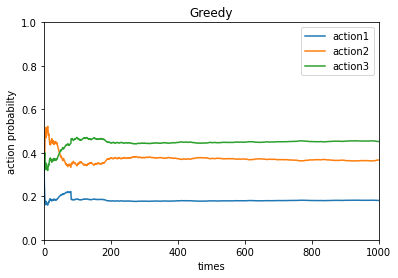

In [4]:
# Greedy Algorithm
al_type = 'Greedy'

trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)
theta_greedy = np.zeros(n_bandits)
prob = []
y_0 = []
y_1 = []
y_2 = []
sum=0

for n in range(1,times+1):
    # 각 bandit에 대한 사전분포(Beta distribution) 및 모델 업데이트.
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]
    theta_greedy = [d.mean() for d in bandit_priors]
    success_score = np.zeros(n_bandits)

    for i in range(0, len(theta_greedy)):
      success_score[i] = theta_greedy[i] * reward_bandits[i]

    chosen_bandit = np.argmax(success_score)
    outcome = pull(chosen_bandit)

    trials[chosen_bandit] += 1
    if outcome != 0:
      success[chosen_bandit] += 1

    for i in range(0,n_bandits):
        sum += theta_greedy[i]
    prob = theta_greedy / sum

    y_0 = np.append(y_0, prob[0])
    y_1 = np.append(y_1, prob[1])
    y_2 = np.append(y_2, prob[2])
    sum=0

print('theta_greedy=', theta_greedy)
plot(y_0, y_1, y_2,al_type, times)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


theta_epsilon= [0.14655172413793102, 0.4219948849104859, 0.6822429906542056]


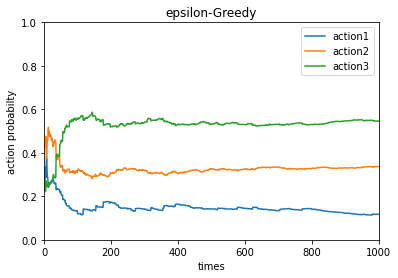

In [5]:
# epsilon-Greedy Algorithm
al_type = 'epsilon-Greedy'

trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)
theta_epsilon = np.zeros(n_bandits)
epsilon = 0.3
prob = []
y_0 = []
y_1 = []
y_2 = []
sum=0


for n in range(1,times+1):
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]

    #Exploration을 할지 말지 결정.
    be_greedy = np.random.rand() > epsilon
    if be_greedy:                           #만약 greedy하기로 했다면?
        theta_epsilon = [d.mean() for d in bandit_priors]
        success_score = np.zeros(n_bandits)
        for i in range(0, n_bandits):
          success_score[i] = theta_epsilon[i] * reward_bandits[i]
        chosen_bandit = np.argmax(success_score)      
    else :                                  #만약 exploration하기로 했다면?
        chosen_bandit = np.random.randint(0,n_bandits)
    outcome = pull(chosen_bandit)

    trials[chosen_bandit] += 1
    if outcome != 0:
      success[chosen_bandit] += 1

    for i in range(0,n_bandits):
        sum += theta_epsilon[i]
    prob = theta_epsilon / sum
        
    y_0 = np.append(y_0, prob[0])
    y_1 = np.append(y_1, prob[1])
    y_2 = np.append(y_2, prob[2])
    sum=0
    
print('theta_epsilon=', theta_epsilon)
plot(y_0, y_1, y_2,al_type, times)



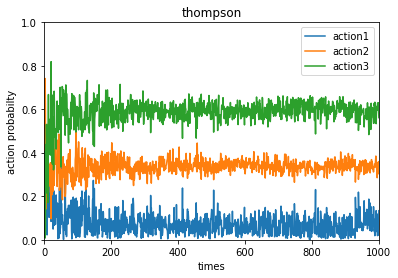

theta_thompson =  [array([0.17634668]), array([0.40114903]), array([0.74017847])]


In [6]:
# Thompson Sampling Algorhithm
al_type = 'thompson'
trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)
theta_thompson = np.ones(n_bandits)*(1/n_bandits)
prob = []
y_0 = []
y_1 = []
y_2 = []
sum=0


for n in range(1, times+1):
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]
    theta_thompson = [d.rvs(1) for d in bandit_priors]

    success_score = np.zeros(n_bandits)         # success score는 각 bandit 당겼을 때 리워드를 고려

    for i in range(0, len(theta_thompson)):
      success_score[i] = theta_thompson[i] * reward_bandits[i]

    chosen_bandit = np.argmax(success_score)
    outcome = pull(chosen_bandit)
    trials[chosen_bandit] += 1
    if outcome != 0:
        success[chosen_bandit] += 1
    
    for i in range(0,n_bandits):
        sum += theta_thompson[i]
    prob = theta_thompson / sum

    y_0 = np.append(y_0, prob[0])
    y_1 = np.append(y_1, prob[1])
    y_2 = np.append(y_2, prob[2])
    sum=0


plot(y_0, y_1, y_2, al_type, times)
print("theta_thompson = " , theta_thompson)

C.	시각화 데이터를 관찰하고 문제에 대해 새롭게 알게된 사실이 있다면 간략히 기술하세요.
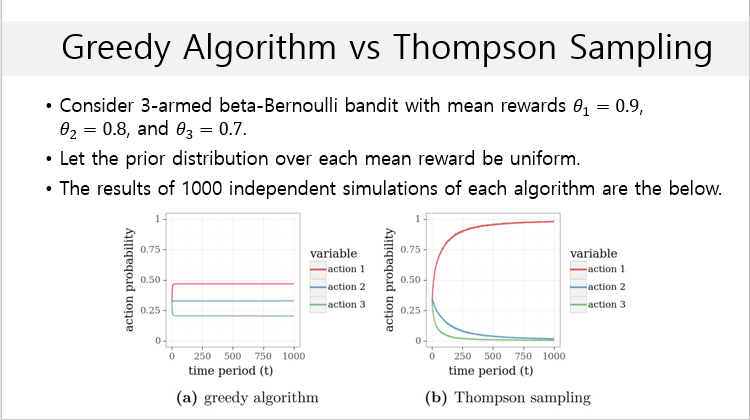



각 action별 bandit mean rewards 가 0.9, 0.8, 0.3이었던 경우 greedy algorithm은 세가지 action이 크게 차이나지 않는 action probability를 가지고, thompson sampling의 경우 action 1이 action 2와 action 3에 비해 훨씬 큰 action probability를 갖는 것을 알 수 있었다.



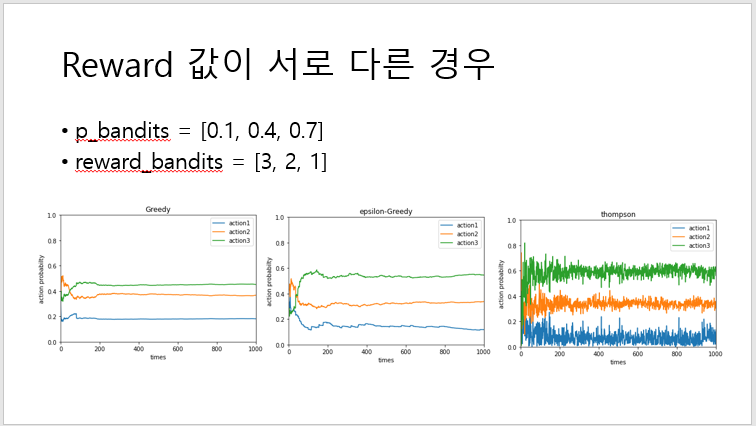



팔이 3개 이고, p_bandits가 0.1, 0.4, 0.7 이고 reward 가 3, 2, 1 로 주어진 상황에서는 greedy와 epsilon-Greedy에서는 이전과 비슷한 결과가 나왔으나, thompson의 경우 action probabiltiy가 trial에 따라 안정화되지 않고 계속해서 action probability가 크게 변동되는 모습을 보인다. 이는 reward 값이 팔 별로 일정하지 않아서 라고 볼 수 있다.
